In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading the iris dataset
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [6]:
#Creating classification conditions for Iris-Virginica based on petal width
X = iris['data'][:, 3:] #Getting petal width as features
y = (iris['target'] == 2).astype(np.int) #Return 1 if Iris-Virginica, 0 otherwise

In [7]:
#Training a Logistic Regression Model
logistic_reg = LogisticRegression()
logistic_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

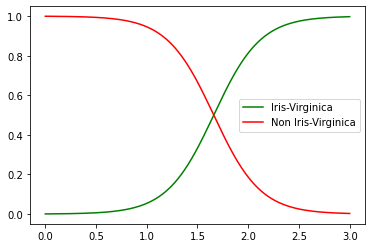

In [12]:
#Viewing the estimated probabilities for flowers using trained model
X_new = np.linspace(0,3,1000).reshape(-1,1) #Creating new feature values to test
y_proba = logistic_reg.predict_proba(X_new) #Creating prediction probabilities for new feature values


#Plotting the estimated probabilities
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "r-", label="Non Iris-Virginica")
plt.legend()
plt.show()

Thus, the model indicates that the flowers with petal length less than approximately 1.7 are Non Iris-Virginica otherwise it will be classified as Iris-VIrginica

In [13]:
#Prediciting for a new feature using concluded results
logistic_reg.predict([[1.7], [1.5]])

array([1, 0])

# Softmax Regression (MultiLogistic Regression)

In [14]:
#Creating the classification conditions (features)
X = iris.data[:, (2,3)]
y = iris.target

In [15]:
#Training the softmax regressor using Logistic Regression
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#Predicting using the trained Softmax Regressor
softmax_reg.predict([[5,2]]), softmax_reg.predict_proba([[5,2]])

(array([2]), array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]]))

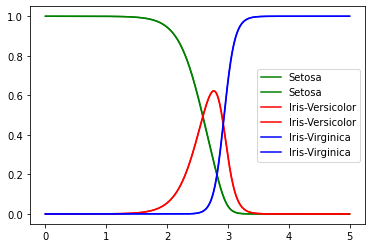

In [26]:
#Plotting graph for softmax regression
X_new = np.linspace(0,5,1000).reshape(-1,2)
y_proba = softmax_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:,0], "g-", label="Setosa")
plt.plot(X_new, y_proba[:,1], "r-", label="Iris-Versicolor")
plt.plot(X_new, y_proba[:,2], "b-", label="Iris-Virginica")
plt.legend()
plt.show()